In [1]:
import pandas as pd
import numpy as np

In [2]:
import xlrd

In [3]:
file_list = ['publishedweek2015.xls',
'publishedweek522016.xls',
'publishedweek522017.xls',
'publishedweek522018withupdatedrespiratoryrow.xls',
'publishedweek522019.xls',
'publishedweek532020.xlsx',
'publishedweek032021replacement.xlsx']

In [4]:
list_of_pd = []
for f in file_list:
    
    file_name = "raw_uk_weekly_death_data/{}".format(f)
    xls = xlrd.open_workbook(file_name, on_demand=True)
    sheet_names = xls.sheet_names()
    
    desired_name = [d for d in sheet_names if 'weekly figure' in d.lower()][0]
    
    print(desired_name)
    
    df = pd.read_excel(file_name, sheet_name=desired_name)\
            .dropna(axis=0, how='all').dropna(axis=1, how='all').set_index(['Contents'])

    df.columns = df.loc['Week number']
    df = df.drop(['Week number']).head(10)
    
    desired_row = [d for d in df.index if 'total deaths, all ages' in str(d).lower()][0]
    
    df = df.loc[[desired_row]].dropna(axis =1, how='all').T
    
    df.columns = [desired_name]
    
    list_of_pd.append(df)

Weekly Figures 2015
Weekly figures 2016
Weekly figures 2017
Weekly figures 2018
Weekly figures 2019
Weekly figures 2020
Weekly figures 2021


In [5]:
df_final = list_of_pd[0]

In [6]:
for year_df in list_of_pd[1:]:
    df_final = df_final.merge(year_df, left_index=True, right_index=True, how='outer')

In [7]:
df_final.head()

,Weekly Figures 2015,Weekly figures 2016,Weekly figures 2017,Weekly figures 2018,Weekly figures 2019,Weekly figures 2020,Weekly figures 2021
Week number,,,,,,,
1,12286,13045,11991,12723,10955,12254,17751
2,16237,11501,13715,15050,12609,14058,18042
3,14866,11473,13610,14256,11860,12990,18676
4,13934,11317,12877,13935,11740,11856,NaN
5,12900,11052,12485,13285,11297,11612,NaN


In [8]:
df_final.tail()

,Weekly Figures 2015,Weekly figures 2016,Weekly figures 2017,Weekly figures 2018,Weekly figures 2019,Weekly figures 2020,Weekly figures 2021
Week number,,,,,,,
50,10269,10533,11217,10550,11188,12292,NaN
51,10689,11493,12517,11116,11926,13011,NaN
52,8630,8003,8487,7131,7533,11520,NaN
53,7524,NaN,NaN,NaN,NaN,10069,NaN
53 7,NaN,NaN,NaN,NaN,NaN,NaN,:


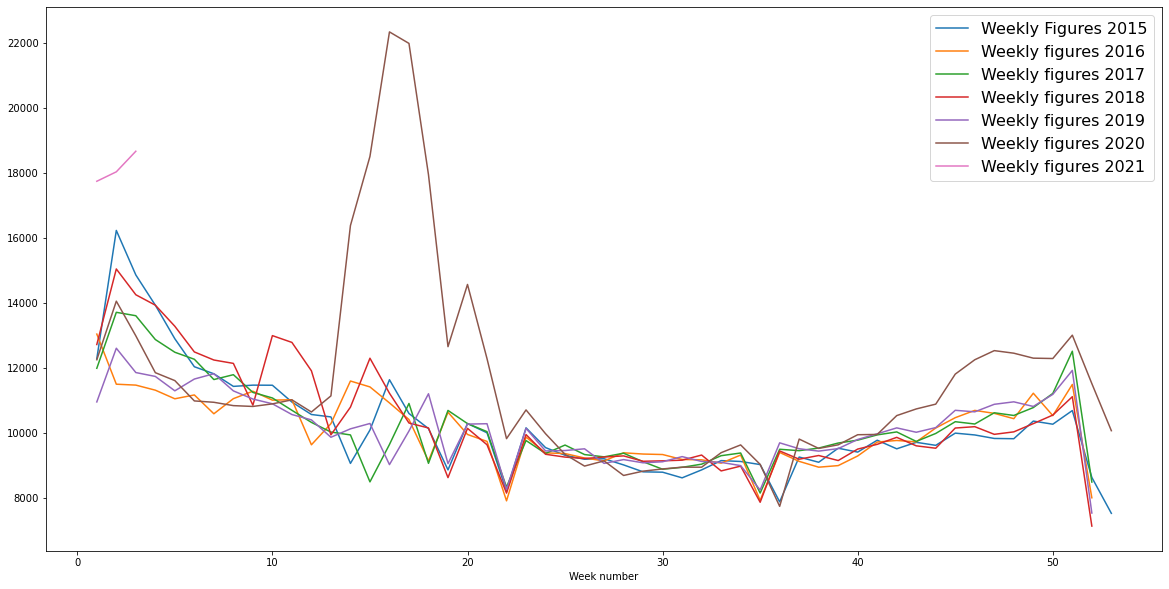

In [9]:
df_final[:-1].plot(figsize=(20,10)).legend(prop={'size': 16})

In [10]:
snowfall 2018 end of feb

SyntaxError: invalid syntax (<ipython-input-10-10a4dcadcc3b>, line 1)

In [ ]:
https://en.wikipedia.org/wiki/2018_in_the_United_Kingdom#March

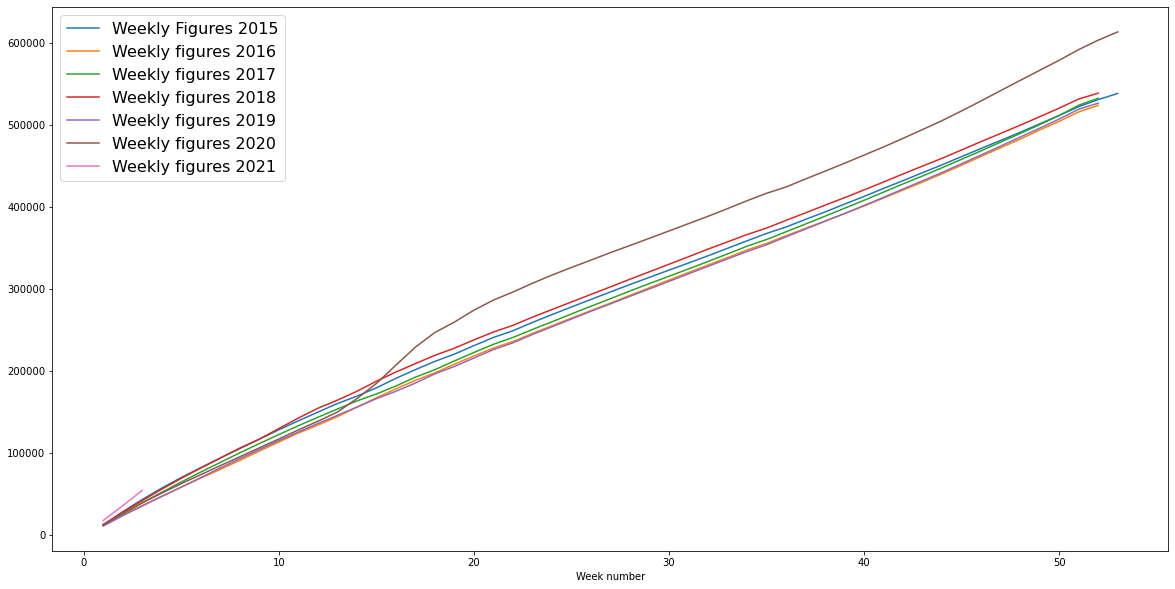

In [11]:
df_final[:-1].cumsum().plot(figsize=(20,10)).legend(prop={'size': 16})